#Data exploration

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded =files.upload()

Saving heart.csv to heart.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
print(df)

     age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236    0  ...      0      0.0      

#Data Preprocessing


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


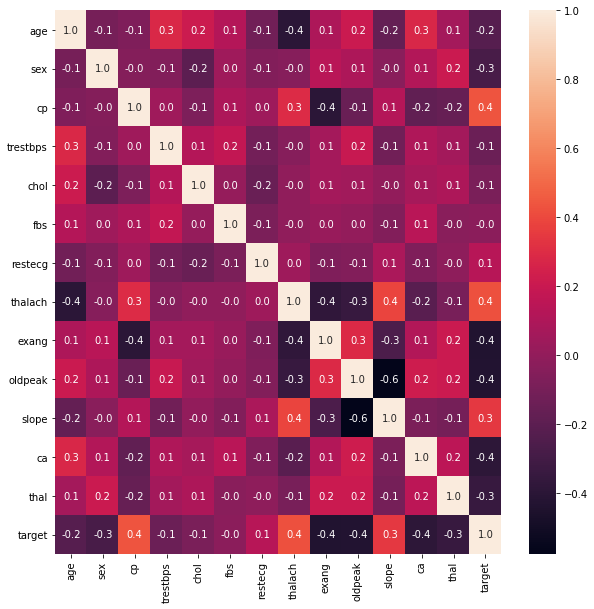

In [9]:
#visualizing corelation between columns
#if a dataset has many columns, corealtion heatmap is used to analyze the data
#stronger the color, larger the corelation magnitude eg in target row, cp has value 0.4 which is a strong positive corelation
#df.corr() is the corelation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

In [12]:
#age analysis
#age  #no.of people
df.age.value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

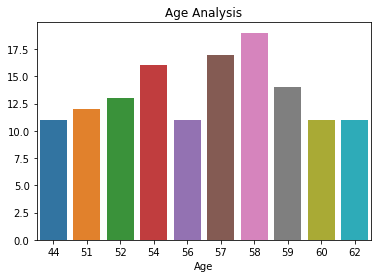

In [19]:
sns.barplot(x=df.age.value_counts()[:10].index, y=df.age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel=("Age Counter")
plt.title("Age Analysis")
plt.show()

In [20]:
df.target.value_counts()
#returns number of 1s and number of 0s
#1: people with heart disease
#0: people who do not have heart disease

1    165
0    138
Name: target, dtype: int64

In [28]:
#Finding percentage of people who have disease and who do not have disease
countNoDisease= len(df[df.target==0])
countDisease= len(df[df.target==1])

print("Percentage of patients who do not have heart disease: {:.2f}%".format((countNoDisease/(len(df.target)))*100))
print("Percentage of patients who have heart disease:  {:.2f}%".format((countDisease/(len(df.target)))*100))

Percentage of patients who do not have heart disease: 45.54%
Percentage of patients who have heart disease:  54.46%


In [31]:
#Finding percentage of male and female patients
countFemale= len(df[df.sex==0])
countMale= len(df[df.sex==1])

print("Percentage of female patients: {:.2f}%".format((countFemale/(len(df.sex)))*100))
print("Percentage of male patients:  {:.2f}%".format((countMale/(len(df.sex)))*100))



Percentage of female patients: 31.68%
Percentage of male patients:  68.32%


In [33]:
#Dividing people based on their age groups
young_age= df[(df.age>=29) & (df.age<40)]
mid_age= df[(df.age>=40) & (df.age<55)]
old_age= df[(df.age>=55)]

print("Young Age: ",(len(young_age)))
print("Middle Age: ",(len(mid_age)))
print("Old Age: ",(len(old_age)))

Young Age:  16
Middle Age:  128
Old Age:  159


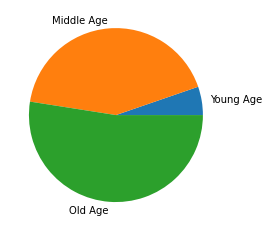

In [36]:
#Creating a piechart
color= ['blue', 'green', 'red']
explode= [0.1, 0.1, 0.1]
plt.figure(figsize=(4,4))
plt.pie([len(young_age), len(mid_age), len(old_age)], labels= ['Young Age', 'Middle Age', 'Old Age'])
plt.show()

In [37]:
#chest pain analysis
#from the results, we can kmow that there are 4 different variations in the chest pain
df.cp.value_counts()


0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [39]:
#finding unique values in the target column
df.target.unique()

array([1, 0])

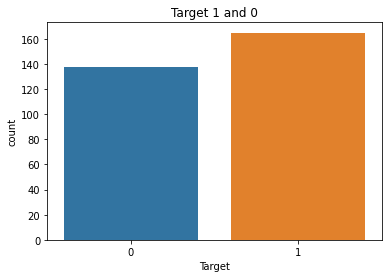

In [41]:
sns.countplot(df.target)
plt.xlabel('Target')
plt.ylabel=('Count')
plt.title('Target 1 and 0')
plt.show()

In [42]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


#Building the model

In [44]:
from sklearn.linear_model import LogisticRegression
x_data= df.drop(['target'], axis=1)
y= df.target.values

In [45]:
#splitting test set and training set
x_train, x_test, y_train, y_test= train_test_split(x_data, y, test_size=0.2, random_state=0)

In [47]:
#Logistic Regression Model
lr= LogisticRegression()
lr.fit(x_train, y_train)
print("Test Accuracy: {:.2f}%".format(lr.score(x_test,y_test)*100))

Test Accuracy: 85.25%


In [48]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)
print("Test Accuracy: {:.2f}%".format(knn.score(x_test,y_test)*100))


Test Accuracy: 63.93%


In [50]:
#Support Vector Model
from sklearn.svm import SVC
svm= SVC(random_state= 1)
svm.fit(x_train, y_train)
print("Test Accuracy: {:.2f}%".format(svm.score(x_test,y_test)*100))

Test Accuracy: 68.85%


In [51]:
#Naive Bayes Approach
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train, y_train)
print("Test Accuracy: {:.2f}%".format(nb.score(x_test,y_test)*100))

Test Accuracy: 85.25%


In [52]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(x_train, y_train)
print("Test Accuracy: {:.2f}%".format(rf.score(x_test,y_test)*100))


Test Accuracy: 85.25%
